In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

print("--- Verinin İlk 5 Satırı ---")
print(df.head())

print("\n--- Veri Seti Bilgisi (info) ---")
df.info()

--- Verinin İlk 5 Satırı ---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

--- Veri Seti Bilgisi (info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
# 1. Encoding 
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Özellik (X) ve Hedef (y) Değişkenlerini Ayırma
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# 3. Veriyi Eğitim ve Test Olarak Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Ölçeklendirme (Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Engineering tamamlandı. Veri eğitime hazır.")

Feature Engineering tamamlandı. Veri eğitime hazır.


In [4]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

print("Lineer Regresyon modeli başarıyla eğitildi.")

Lineer Regresyon modeli başarıyla eğitildi.


In [5]:
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"--- Model Değerlendirme Sonuçları ---")
print(f"R-Kare (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

--- Model Değerlendirme Sonuçları ---
R-Kare (R²): 0.7836
Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28


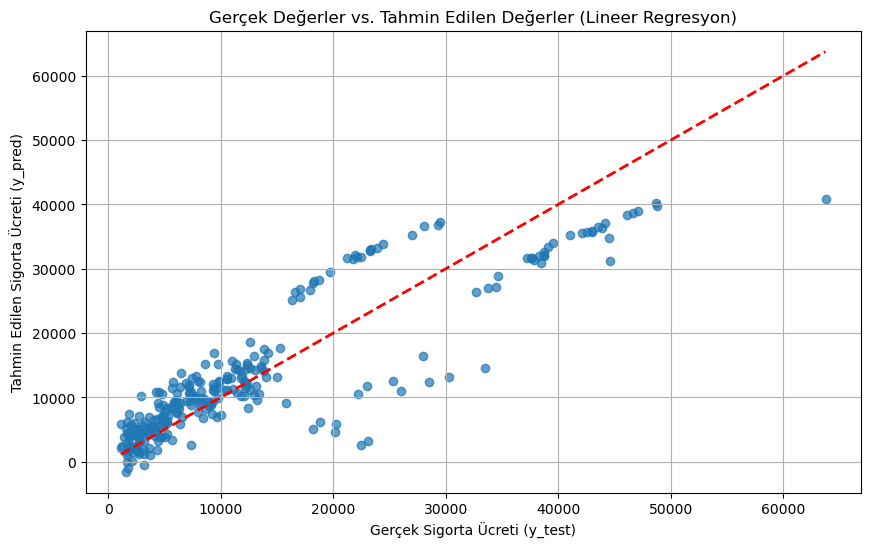

In [6]:
plt.figure(figsize=(10, 6))

# x ekseni: Gerçek değerler, y ekseni: Tahmin edilen değerler
plt.scatter(y_test, y_pred, alpha=0.7)

# Tahmin çizgisi (y=x doğrusu)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title('Gerçek Değerler vs. Tahmin Edilen Değerler (Lineer Regresyon)')
plt.xlabel('Gerçek Sigorta Ücreti (y_test)')
plt.ylabel('Tahmin Edilen Sigorta Ücreti (y_pred)')
plt.grid(True)
plt.show()

### 6. Sonuç

Bu çalışmada, sigorta masraflarını tahmin etmek için bir Lineer Regresyon modeli geliştirilmiştir.

* Model, test verisi üzerinde **0.7836** R-Kare skoruna ulaşmıştır. 
* Modelin Ortalama Mutlak Hatası (MAE) **4181.19 Dolar** olarak hesaplanmıştır. 
* Grafiğe göre model, düşük ve orta seviyeli masrafları iyi tahmin etmekte, ancak yüksek masraflarda hata payı artmaktadır.